In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math


### ECDF with all Sectors Overlayed (Single Chart/Zoomed In and Zoomed Out)

Below are two ECDF plots with all sectors overlaid. The first ECDF shows the full range of cumulative distributions for each sector. Because the data are highly concentrated around certain values, a second ECDF provides a zoomed-in view to better highlight the distinct distribution patterns of each sector.


Sector
Basic Materials           3768
Communication Services    3768
Consumer Cyclical         3768
Consumer Defensive        3768
Energy                    3768
Financial Services        3768
Healthcare                3768
Industrials               3768
Real Estate               3768
Technology                3768
Utilities                 3768
Name: count, dtype: int64


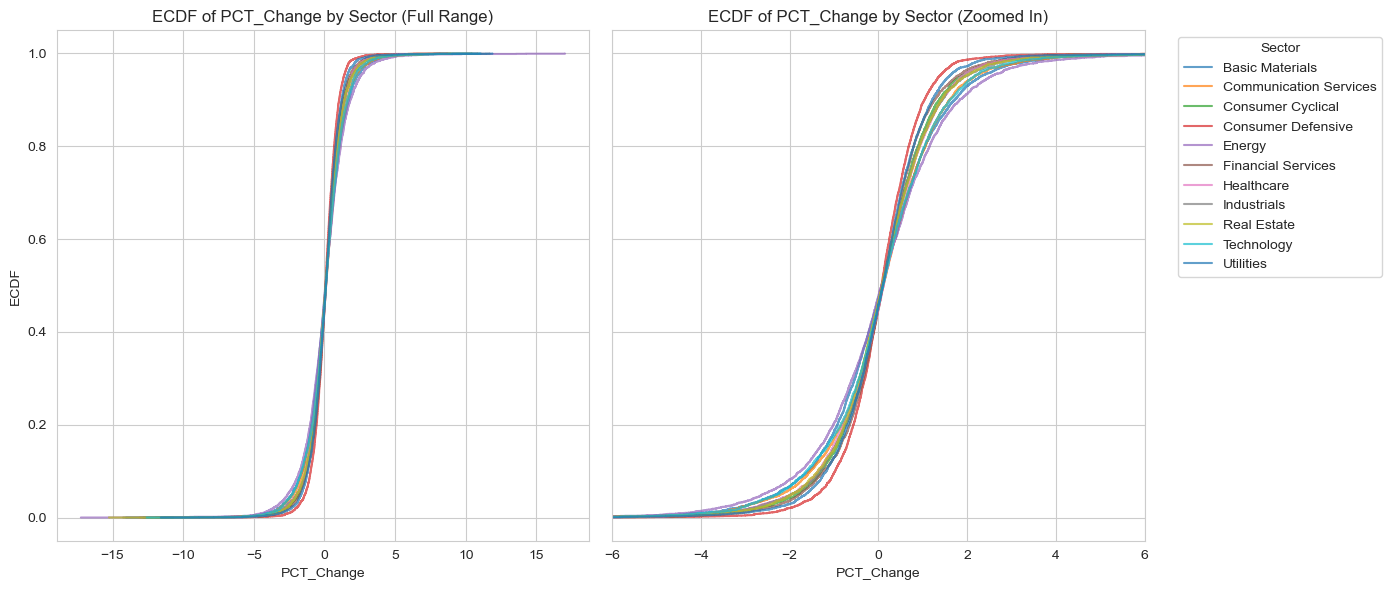

In [11]:
# Read data
df = pd.read_csv('stocks_aggregated.csv')
print(df["Sector"].value_counts())
# Unique categories
categories = df["Sector"].unique()

# normalize to percentage
df['pctChange'] = df['pctChange']*100

# reset variable
categories = df["Sector"].unique()

# set grid
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# --- Plot 1: Full range ECDF ---
for cat in categories:

    # subset and create plot for each sector
    subset = df[df["Sector"] == cat]['pctChange']
    x = np.sort(subset)
    y = np.arange(1, len(x) + 1) / len(x)
    axes[0].step(x, y, where="post", label=cat, alpha=0.7)

axes[0].set_title("ECDF of PCT_Change by Sector (Full Range)")
axes[0].set_xlabel("PCT_Change")
axes[0].set_ylabel("ECDF")
axes[0].grid(True)

# --- Plot 2: Zoomed in ECDF ---
for cat in categories:

    # subset and create plot for each sector
    subset = df[df["Sector"] == cat]['pctChange']
    x = np.sort(subset)
    y = np.arange(1, len(x) + 1) / len(x)
    axes[1].step(x, y, where="post",  label=cat,  alpha=0.7)

axes[1].set_title("ECDF of PCT_Change by Sector (Zoomed In)")
axes[1].set_xlabel("PCT_Change")
axes[1].set_xlim(-6, 6)   # adjust to your preferred zoom level
axes[1].grid(True)

# --- legend ---
axes[1].legend(title="Sector", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

### KDE Plots (Zoomed In/Full Range)

Below is 2 KDE plots with all sectors overlayed. The first KDE shows the full range of the density distributions of the sectors. Due to the high concentration of data, a second KDE showing a zoomed in (changing scope fo graph) view to highlight the unique distributions of each sector.

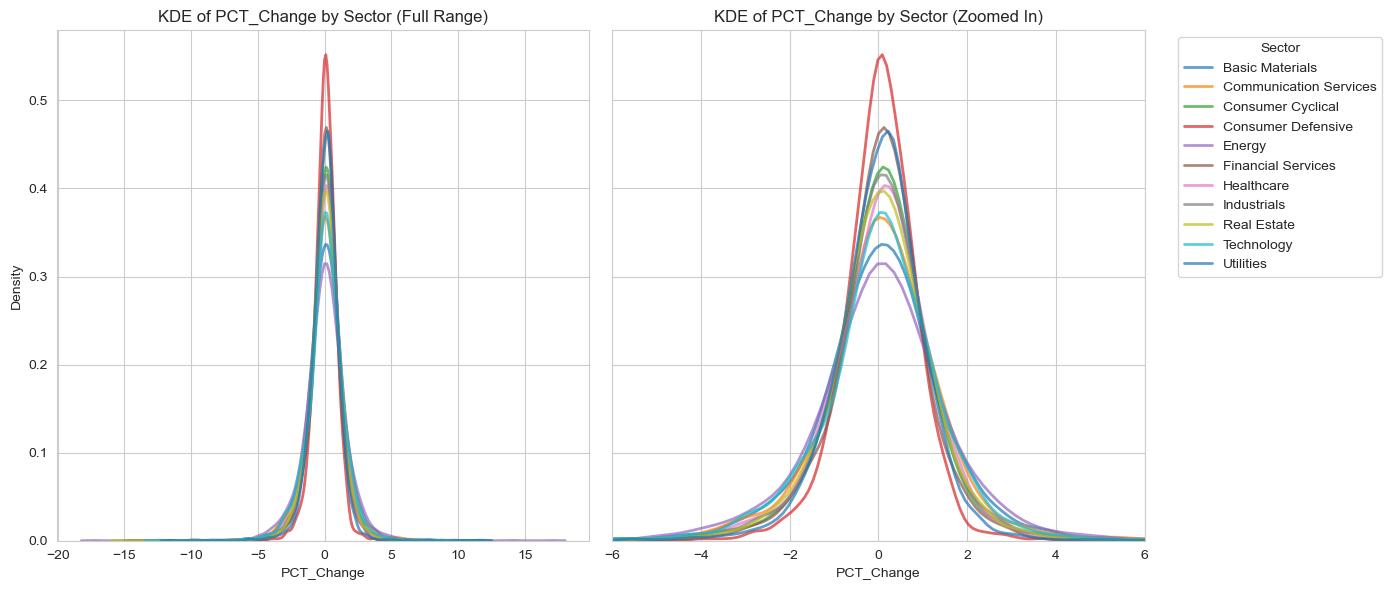

In [12]:
categories = df["Sector"].unique()

# creates grid for plots
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# --- Plot 1: Full range ---
for cat in categories:

    # subset for each sector and plot
    subset = df[df["Sector"] == cat]['pctChange']
    sns.kdeplot(subset, label=cat, fill=False, alpha=0.7, linewidth=2, ax=axes[0])

axes[0].set_title("KDE of PCT_Change by Sector (Full Range)")
axes[0].set_xlabel("PCT_Change")
axes[0].set_ylabel("Density")

# --- Plot 2: Zoomed in ---
for cat in categories:

    # subset for each sector and plot
    subset = df[df["Sector"] == cat]['pctChange']
    sns.kdeplot(subset,  label=cat, fill=False, alpha=0.7, linewidth=2, ax=axes[1])

axes[1].set_title("KDE of PCT_Change by Sector (Zoomed In)")
axes[1].set_xlabel("PCT_Change")
axes[1].set_xlim(-6, 6)   # adjust this range to zoom

# --- Legend ---
axes[1].legend(title="Sector", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### New Value Generation
This code helps assess whether randomly sampling values from the existing ECDF of each sector can produce accurate predictions. The results from this non-parametric approach will be compared with those from the Markov Model to evaluate the strengths and weaknesses of each method.

Given the large number of observations, random sampling from the ECDF is expected to approximate the true underlying structure of the distribution. From the existing ECDF, new percentage change (PCT_Change) values for each sector will be generated over 1,000 simulated days by randomly sampling from the empirical distribution. These generated values will then be used to calculate the overall value of each sector on a daily basis, modeling how sector values evolve over time.

Both the percentage change and overall sector value will be plotted across the 1,000-day simulation to visualize the behavior of the newly generated data. Tracking the overall change in sector value throughout this period allows us to identify which sectors are projected to become the most and least valuable. The PCT_Change trends also provide insight into sector volatility, highlighting which sectors are likely to experience the greatest growth or decline.

### Simulation Code

In [13]:
# map to store sector dfs
df_map = {}

# map to store pct_change values for each sector
pct_map = {}

# Creates dictionary with pctChange values of each sector
for cat in categories:

    # filters by sector and maps sector name to sector df
    subset = df[df["Sector"] == cat].reset_index(drop=True)
    df_map[cat] = subset

    # converts each sector's pct change to array and maps values to name of sector
    subset = df[df["Sector"] == cat]['pctChange'].reset_index(drop=True)
    pct_map[cat] = subset.to_numpy()


# set seed for reproducibility
np.random.seed(42)

# loops through and generates new values for each day of each sector and adds to dataframe
for cat in categories:

    new_values = []
    current_vals = pct_map[cat]
    sector_df = df_map[cat]

    # generates new pct_change value for each day
    for i in range(len(pct_map[cat])):

        # Set first day to same value as original data
        if i == 0:
            new_values.append(current_vals[i])
        
        # selects a random PCT_change value from distribution
        else:
            val = np.random.randint(1, len(current_vals))
            new_values.append(current_vals[val])

    # adds new values to dataframe 
    sector_df['Sim_pct_change'] = new_values
    sector_df['Sim_pct_change'] = sector_df['Sim_pct_change'].astype('float64')
    df_map[cat] = sector_df

# Set 10 seeds for reproducibility
random_seeds = [10, 15, 20, 25, 30]
# Create dictionary to store results for each sector
sim_results = {cat: [] for cat in categories}

# Run 5 simulations
for seed in random_seeds:
    np.random.seed(seed)

    for cat in categories:
        sector_df = df_map[cat].copy()
        current_vals = pct_map[cat]

        # --- Simulate pct_change values ---
        new_pct = []
        for i in range(len(current_vals)):
            if i == 0:
                new_pct.append(current_vals[i])
            else:
                val = np.random.randint(1, len(current_vals))
                new_pct.append(current_vals[val])

        sector_df['Sim_pct_change'] = new_pct

        # --- Calculate new adjusted close values ---
        new_adj = []
        for i in range(len(sector_df)):
            if i == 0:
                new_adj.append(sector_df['Adj Close'].iloc[i])
            else:
                prev_val = new_adj[i-1]
                pct = sector_df['Sim_pct_change'].iloc[i]
                new_adj.append(prev_val * (1 + pct/100))

        # Store this simulation's adjusted close values
        sim_results[cat].append(new_adj)

# --- Compute average simulated adjusted close across all 5 runs ---
for cat in categories:
    stacked = np.column_stack(sim_results[cat])   # shape: (days, 5)
    avg_adj_close = stacked.mean(axis=1)          # mean per day across sims
    df_map[cat]['Avg_Sim_Adj_Close'] = avg_adj_close

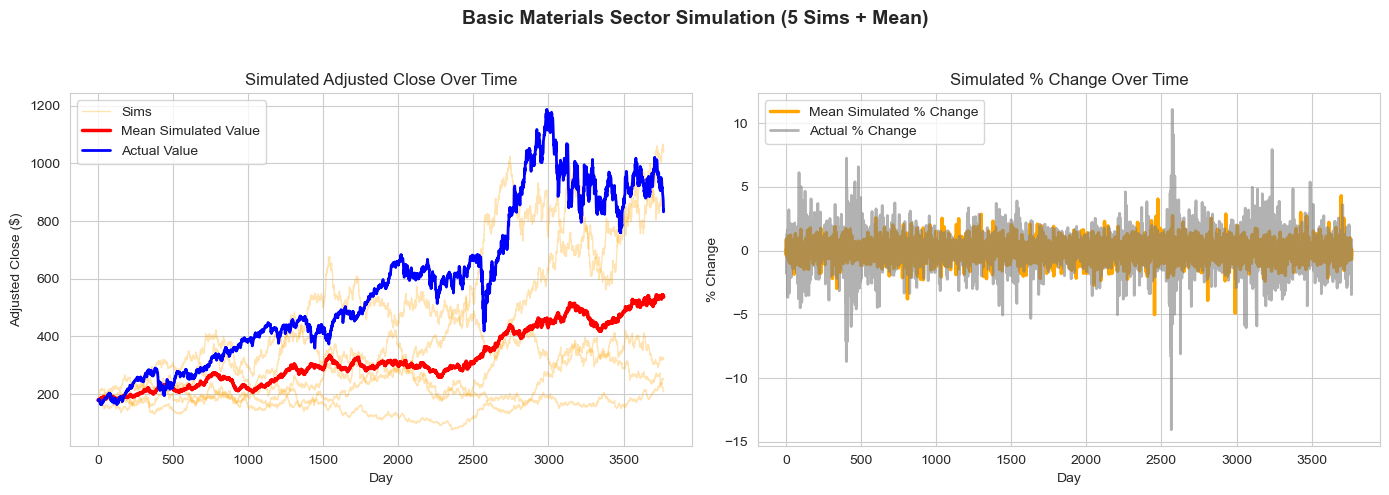

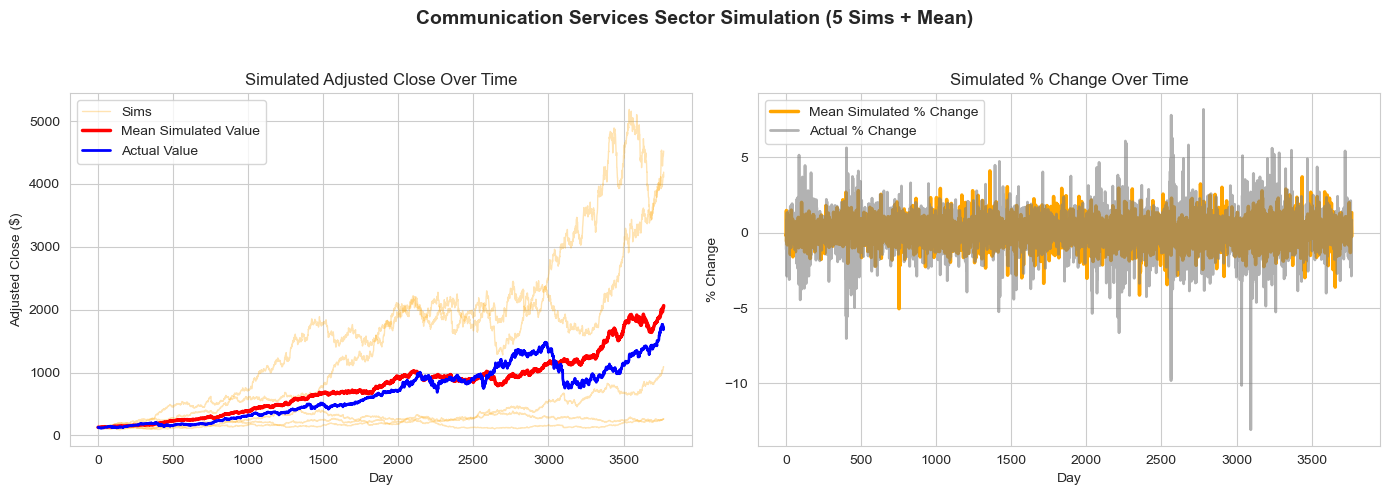

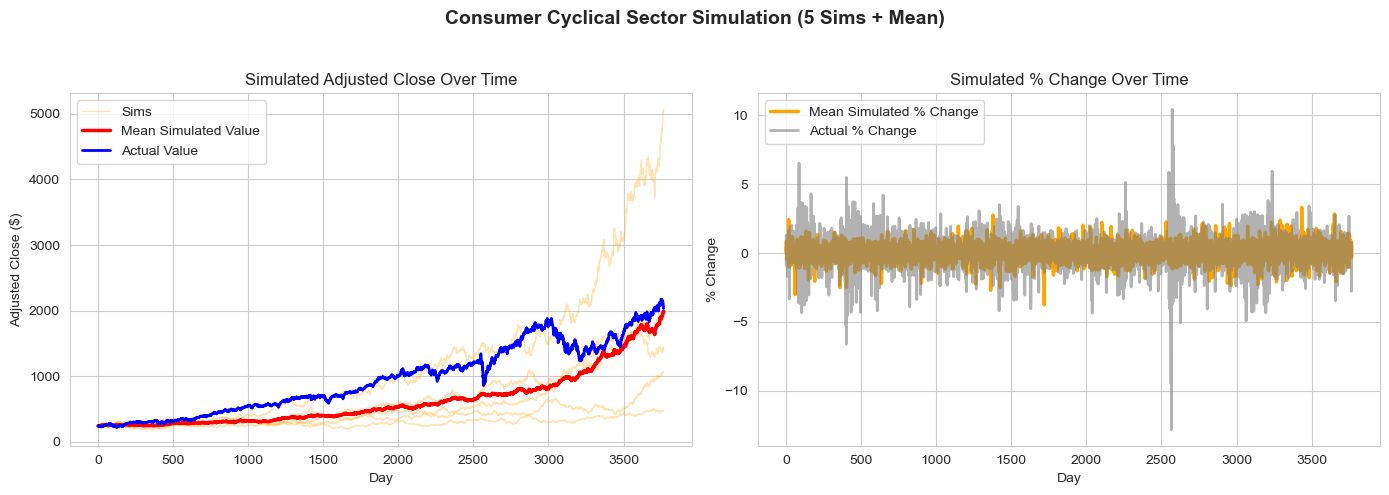

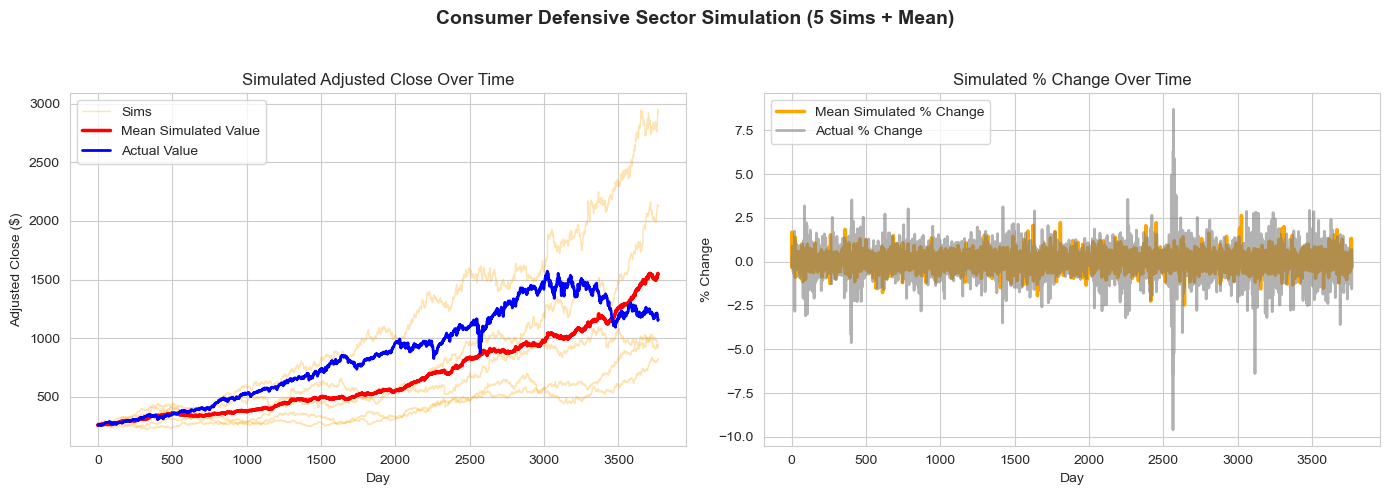

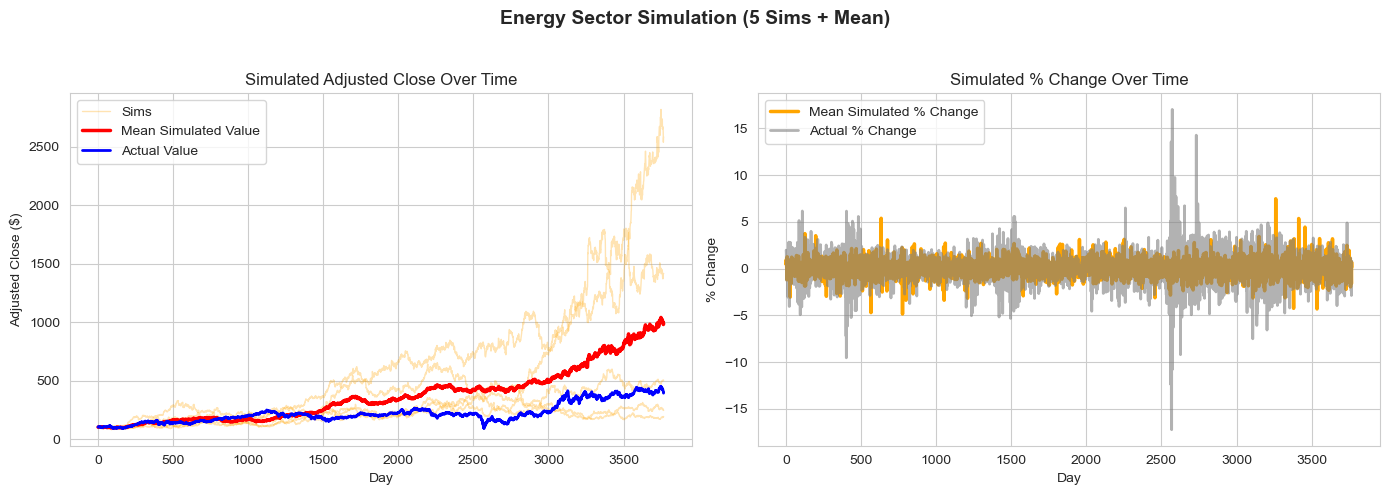

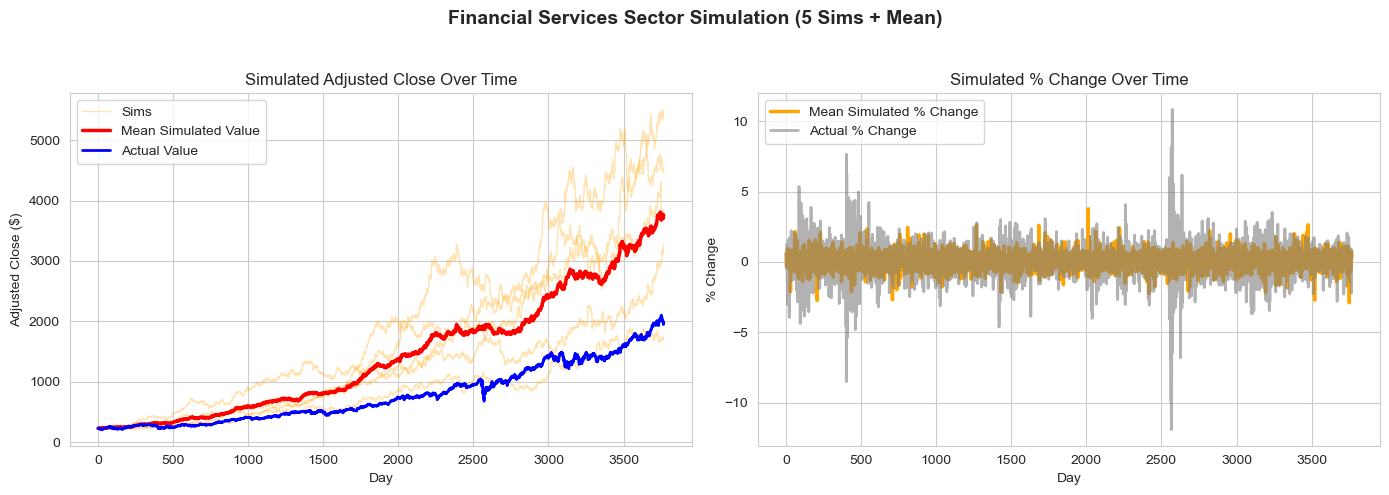

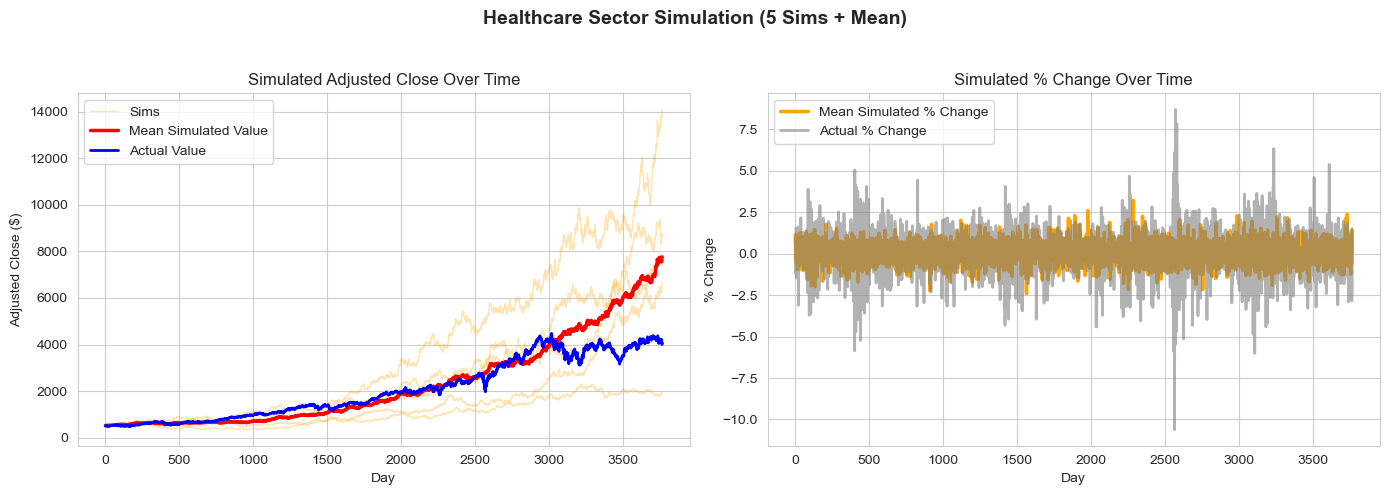

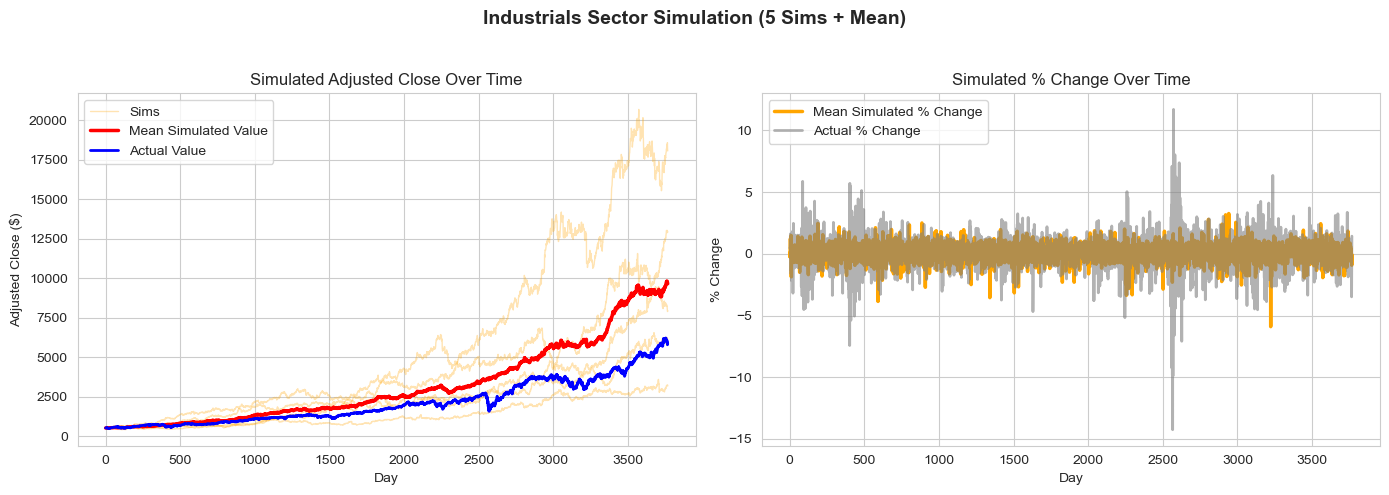

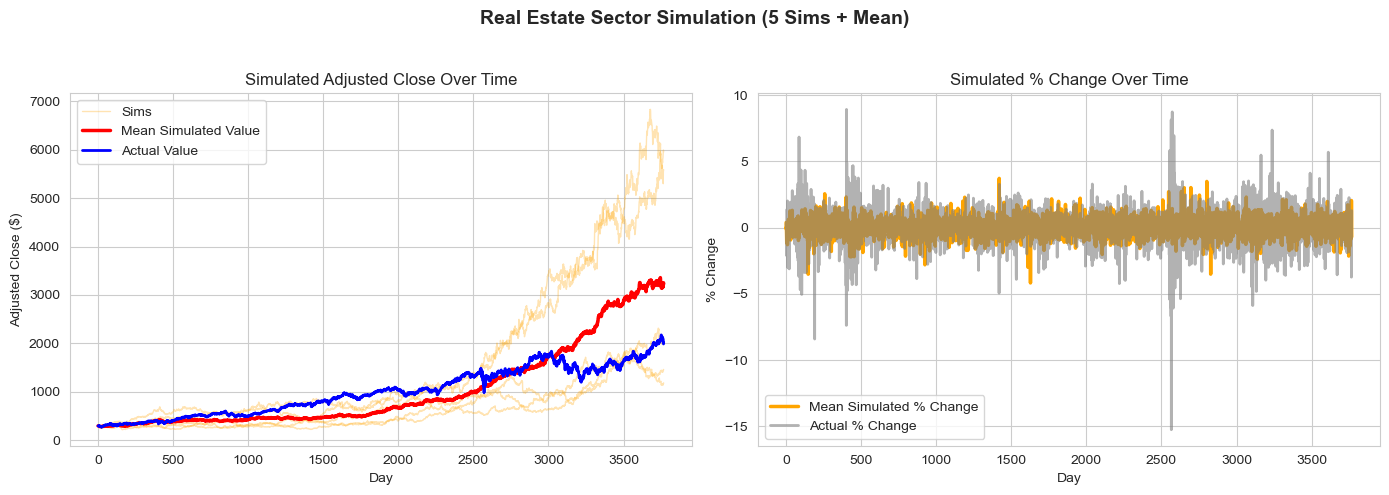

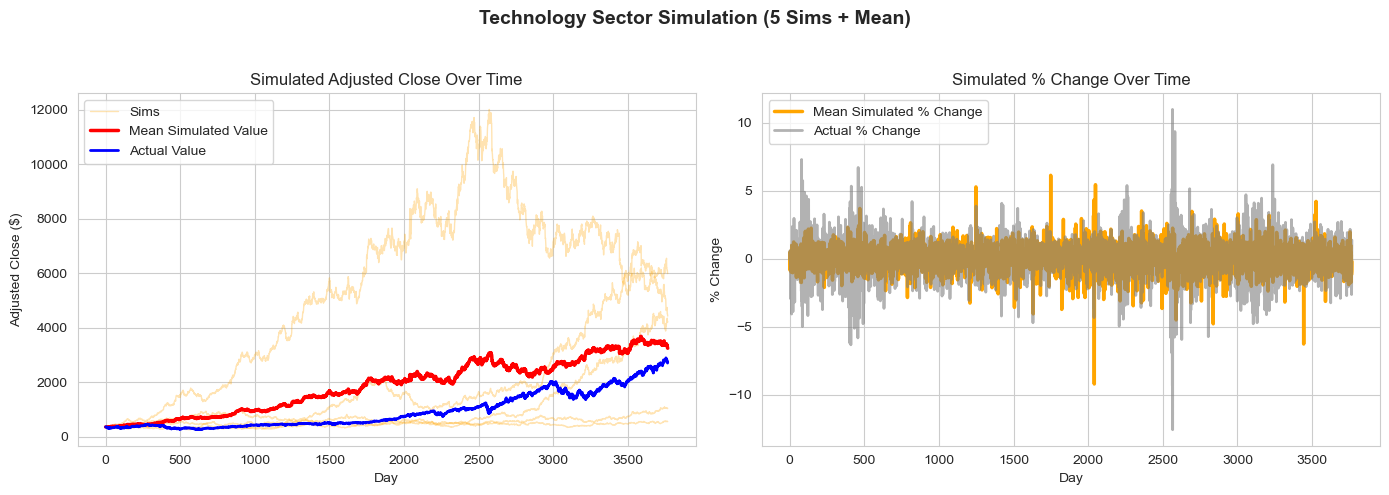

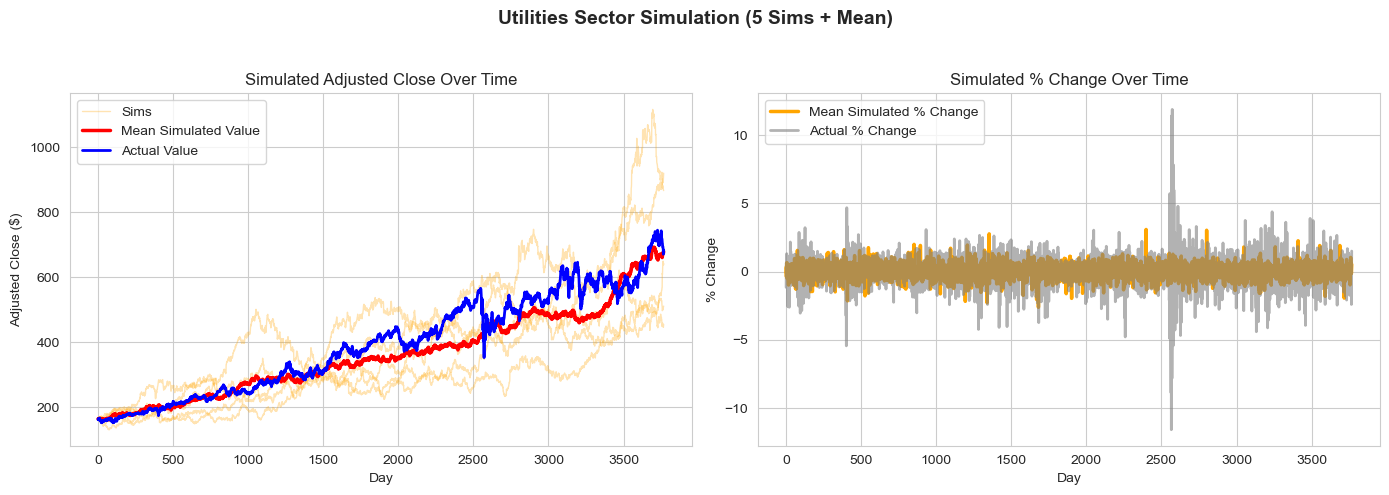

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

for cat in categories:
    sector_df = df_map[cat]

    # Retrieve all 5 sim series and mean (from sim_results dict)
    sim_series = sim_results[cat]                 # list of 5 lists (each sim)
    avg_adj_close = sector_df["Avg_Sim_Adj_Close"]  # already added earlier

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    fig.suptitle(f"{cat} Sector Simulation (5 Sims + Mean)", fontsize=14, fontweight='bold')

    # ---- Plot 1: Simulated Adjusted Close ----
    # plot each simulation line faintly
    for i, sim in enumerate(sim_series):
        axes[0].plot(sector_df.index, sim, color='orange', alpha=0.3, linewidth=1, label=f"Sims" if i == 0 else "")

    # plot the mean of all 5 sims
    axes[0].plot(sector_df.index, avg_adj_close, color='red', linewidth=2.5, label="Mean Simulated Value")

    # plot the actual (real) value
    axes[0].plot(sector_df.index, sector_df["Adj Close"], color='blue', linewidth=2, label="Actual Value")

    axes[0].set_title("Simulated Adjusted Close Over Time")
    axes[0].set_xlabel("Day")
    axes[0].set_ylabel("Adjusted Close ($)")
    axes[0].legend()

    # ---- Plot 2: Simulated % Change ----
    # Compute mean % change across the 5 sims
    # (Each sim’s % change was generated during the loop, so we’ll need them stored.)
    # If not stored, we can approximate with pct change from mean line:
    avg_sim_pct_change = avg_adj_close.pct_change() * 100

    axes[1].plot(sector_df.index, avg_sim_pct_change, color='orange', linewidth=2.5, label="Mean Simulated % Change")
    axes[1].plot(sector_df.index, sector_df["pctChange"], color='gray', alpha=0.6, linewidth=2, label="Actual % Change")

    axes[1].set_title("Simulated % Change Over Time")
    axes[1].set_xlabel("Day")
    axes[1].set_ylabel("% Change")
    axes[1].legend()

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


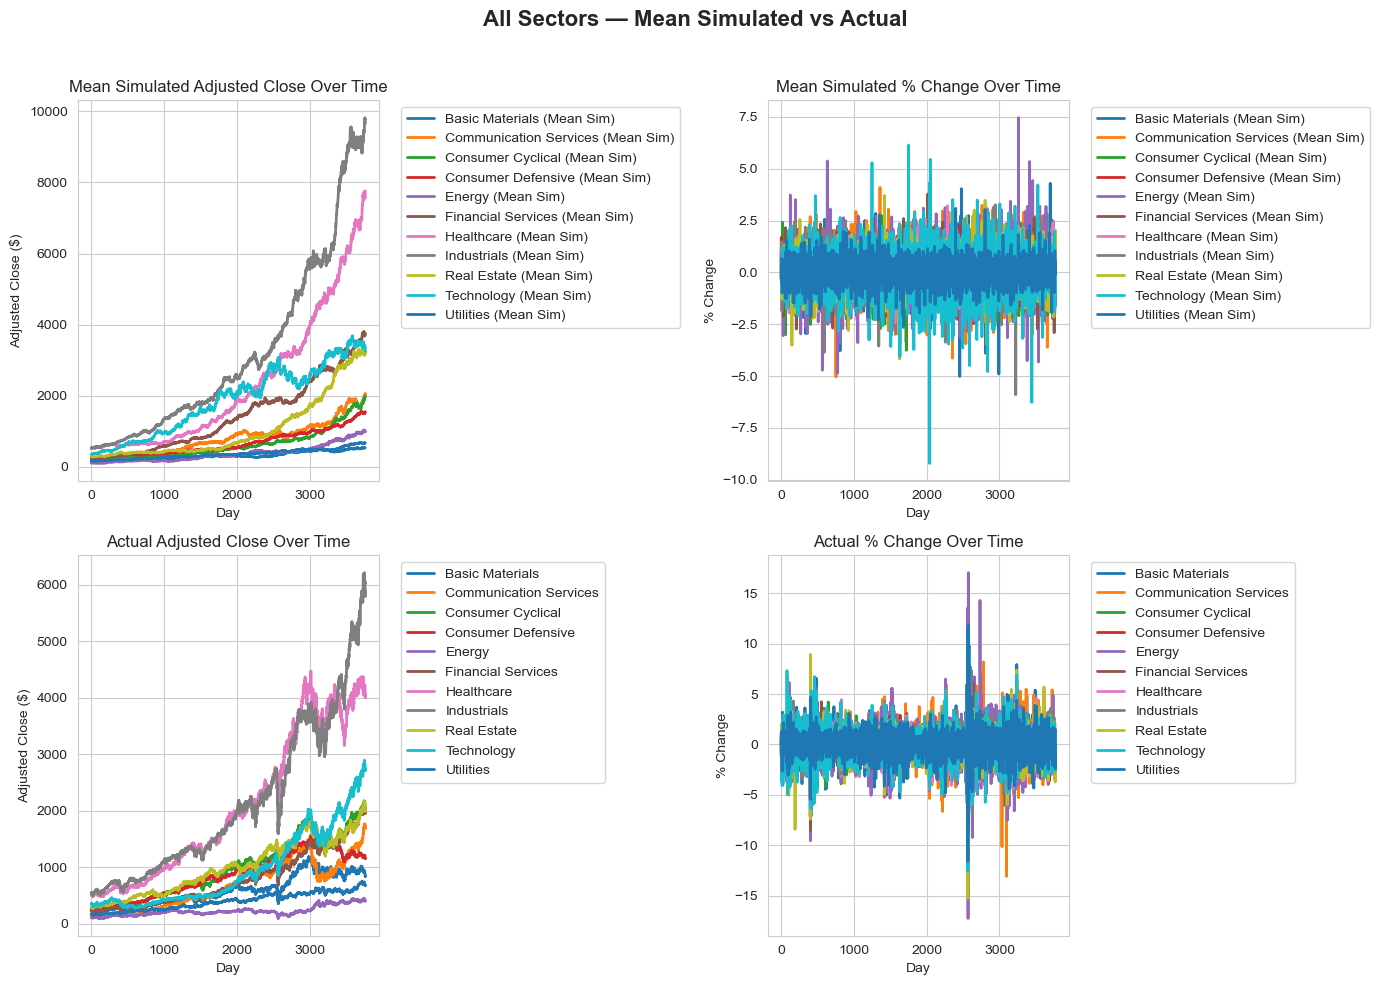

In [15]:
sns.set_style("whitegrid")

# ---- Combined Figure (2x2 Grid) ----
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("All Sectors — Mean Simulated vs Actual", fontsize=16, fontweight='bold')

# ---- Plot 1: Mean Simulated Adjusted Close Over Time ----
for cat in categories:
    sector_df = df_map[cat]
    axes[0, 0].plot(
        sector_df.index,
        sector_df["Avg_Sim_Adj_Close"],
        label=f"{cat} (Mean Sim)",
        linewidth=2
    )

axes[0, 0].set_title("Mean Simulated Adjusted Close Over Time")
axes[0, 0].set_xlabel("Day")
axes[0, 0].set_ylabel("Adjusted Close ($)")
axes[0, 0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# ---- Plot 2: Mean Simulated % Change Over Time ----
for cat in categories:
    sector_df = df_map[cat]
    mean_pct_change = sector_df["Avg_Sim_Adj_Close"].pct_change() * 100
    axes[0, 1].plot(
        sector_df.index,
        mean_pct_change,
        label=f"{cat} (Mean Sim)",
        linewidth=2,
        color=None  # let Matplotlib assign distinct colors
    )

axes[0, 1].set_title("Mean Simulated % Change Over Time")
axes[0, 1].set_xlabel("Day")
axes[0, 1].set_ylabel("% Change")
axes[0, 1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# ---- Plot 3: Actual Adjusted Close Over Time ----
for cat in categories:
    sector_df = df_map[cat]
    axes[1, 0].plot(
        sector_df.index,
        sector_df["Adj Close"],
        label=cat,
        linewidth=2
    )

axes[1, 0].set_title("Actual Adjusted Close Over Time")
axes[1, 0].set_xlabel("Day")
axes[1, 0].set_ylabel("Adjusted Close ($)")
axes[1, 0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# ---- Plot 4: Actual % Change Over Time ----
for cat in categories:
    sector_df = df_map[cat]
    axes[1, 1].plot(
        sector_df.index,
        sector_df["pctChange"],
        label=cat,
        linewidth=2
    )

axes[1, 1].set_title("Actual % Change Over Time")
axes[1, 1].set_xlabel("Day")
axes[1, 1].set_ylabel("% Change")
axes[1, 1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Comparsion Code

The code below is a repeat of the code above to limit the plot of the data to 400 days to provide comparsion with the Markov chain

In [16]:
# map to store sector dfs
df_map = {}

# map to store pct_change values for each sector
pct_map = {}

# Creates dictionary with pctChange values of each sector
for cat in categories:

    # Filter by sector and take first 400 rows
    subset = df[df["Sector"] == cat].iloc[:400].reset_index(drop=True)
    df_map[cat] = subset

    # Convert each sector's pctChange (first 400 rows) to array
    subset_pct = subset['pctChange'].reset_index(drop=True)
    pct_map[cat] = subset_pct.to_numpy()

# loops through and generates new values for each day of each sector and adds to dataframe
for cat in categories:

    new_values = []
    current_vals = pct_map[cat]
    sector_df = df_map[cat]

    # generates new pct_change value for each day
    for i in range(len(pct_map[cat])):

        # Set first day to same value as original data
        if i == 0:
            new_values.append(current_vals[i])
        
        # selects a random PCT_change value from distribution
        else:
            val = np.random.randint(1, len(current_vals))
            new_values.append(current_vals[val])

    # adds new values to dataframe 
    sector_df['Sim_pct_change'] = new_values
    sector_df['Sim_pct_change'] = sector_df['Sim_pct_change'].astype('float64')
    df_map[cat] = sector_df

# Set 10 seeds for reproducibility
random_seeds = [10, 15, 20, 25, 30]
# Create dictionary to store results for each sector
sim_results = {cat: [] for cat in categories}

# Run 5 simulations
for seed in random_seeds:
    np.random.seed(seed)

    for cat in categories:
        sector_df = df_map[cat].copy()
        current_vals = pct_map[cat]

        # --- Simulate pct_change values ---
        new_pct = []
        for i in range(len(current_vals)):
            if i == 0:
                new_pct.append(current_vals[i])
            else:
                val = np.random.randint(1, len(current_vals))
                new_pct.append(current_vals[val])

        sector_df['Sim_pct_change'] = new_pct

        # --- Calculate new adjusted close values ---
        new_adj = []
        for i in range(len(sector_df)):
            if i == 0:
                new_adj.append(sector_df['Adj Close'].iloc[i])
            else:
                prev_val = new_adj[i-1]
                pct = sector_df['Sim_pct_change'].iloc[i]
                new_adj.append(prev_val * (1 + pct/100))

        # Store this simulation's adjusted close values
        sim_results[cat].append(new_adj)

# --- Compute average simulated adjusted close across all 5 runs ---
for cat in categories:
    stacked = np.column_stack(sim_results[cat])   # shape: (days, 5)
    avg_adj_close = stacked.mean(axis=1)          # mean per day across sims
    df_map[cat]['Avg_Sim_Adj_Close'] = avg_adj_close

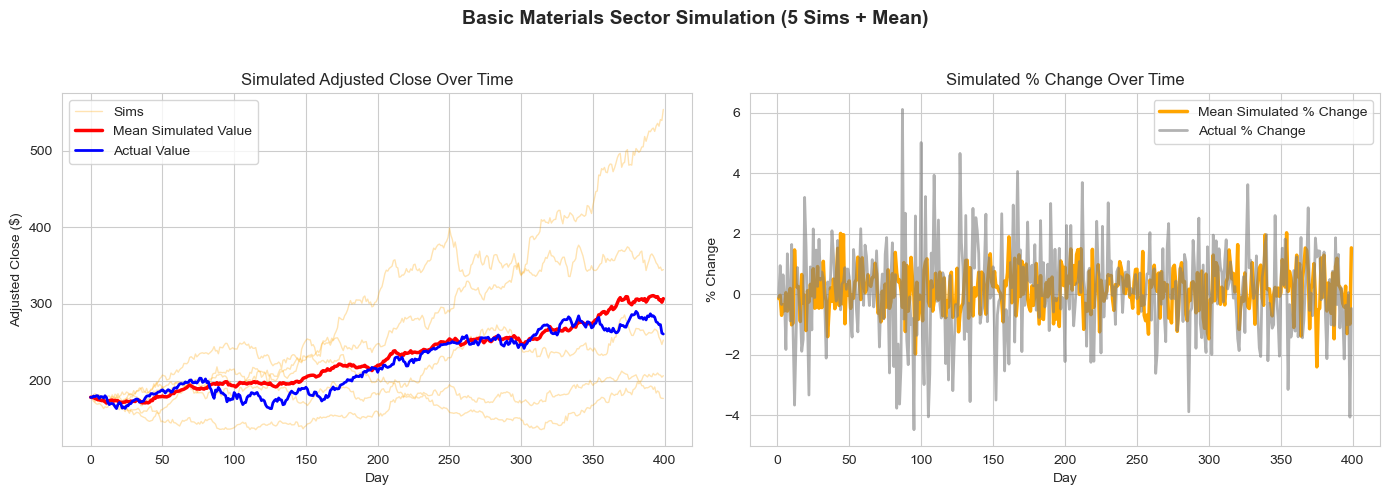

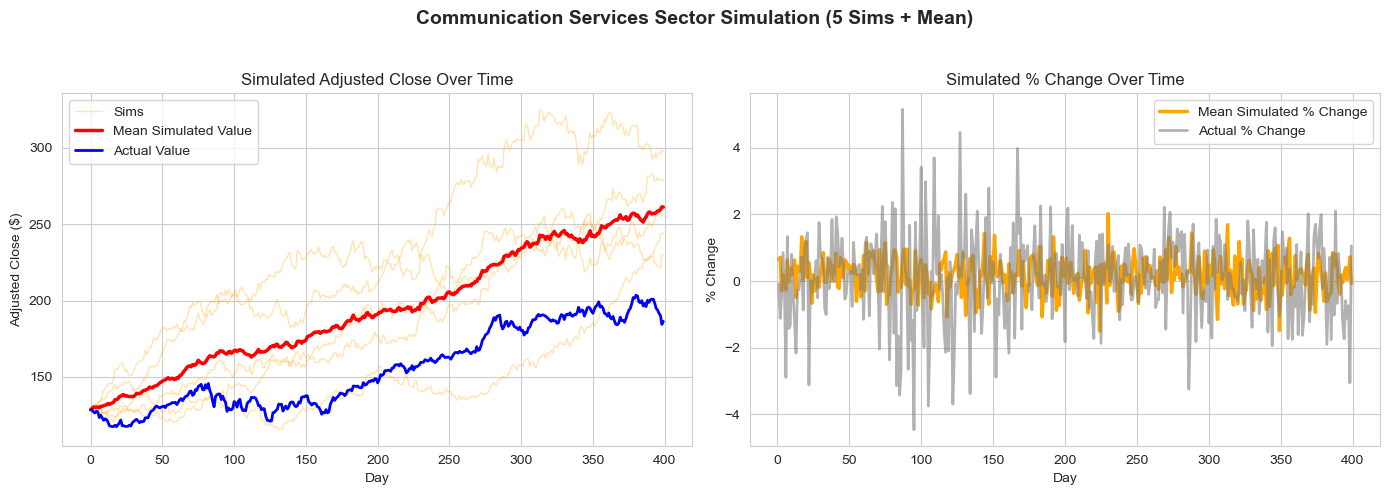

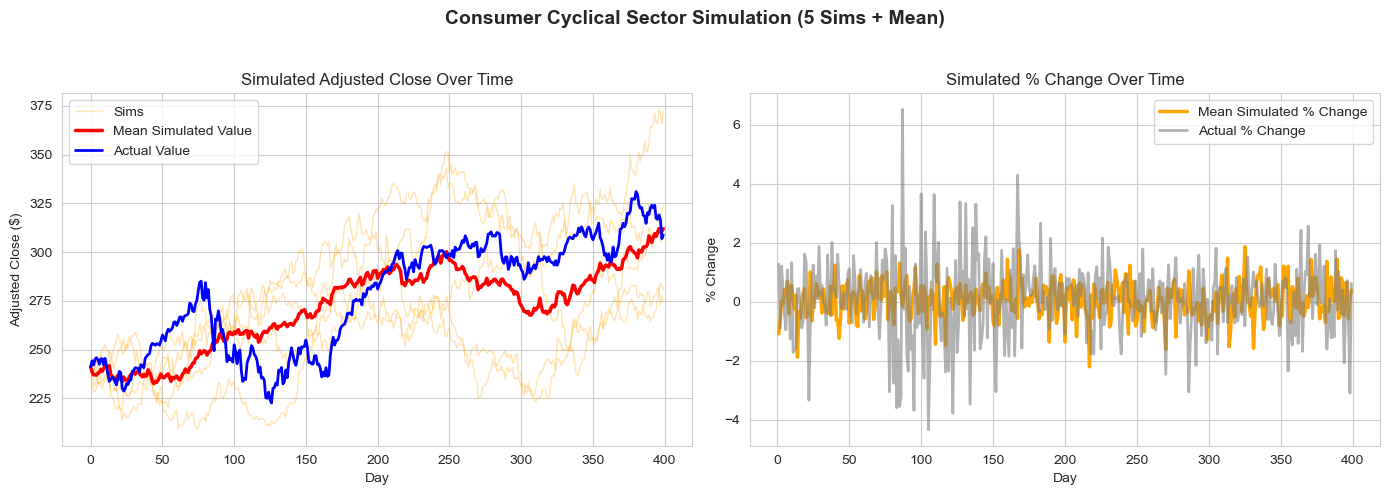

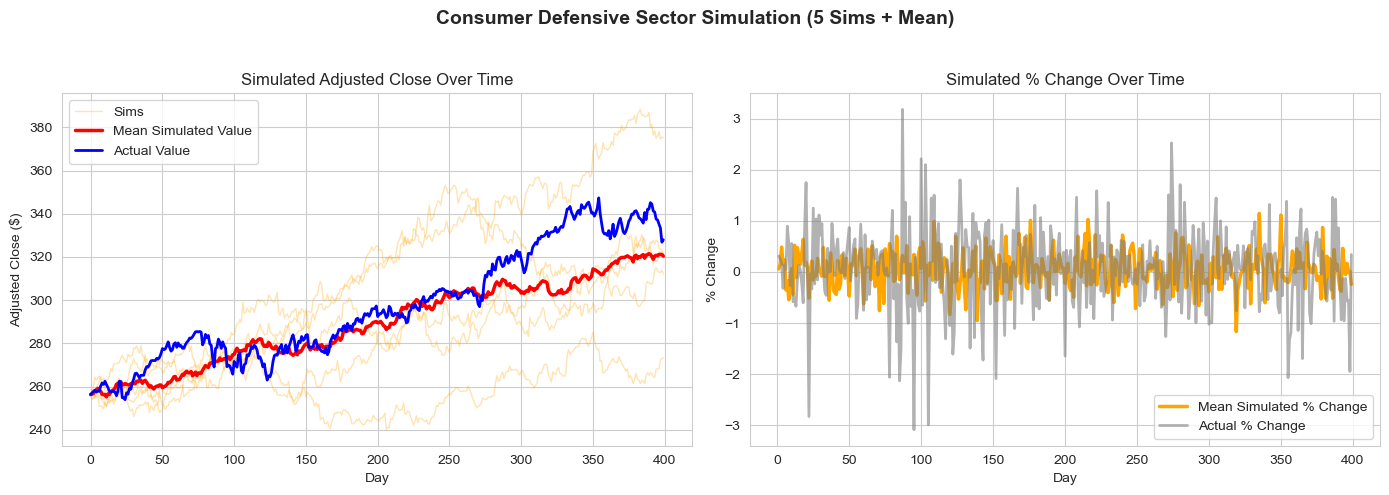

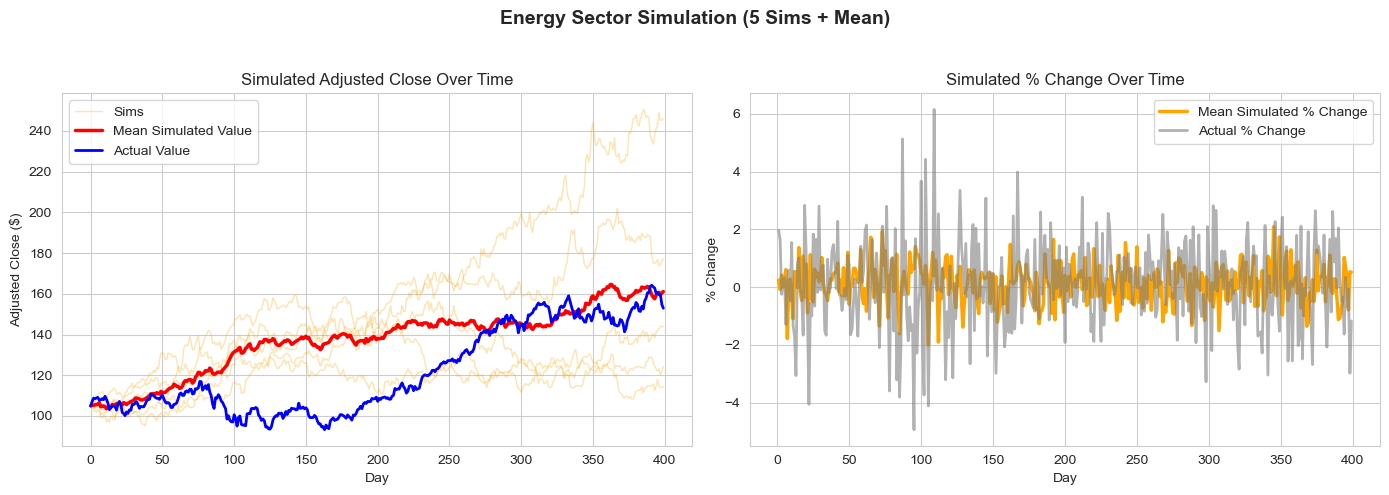

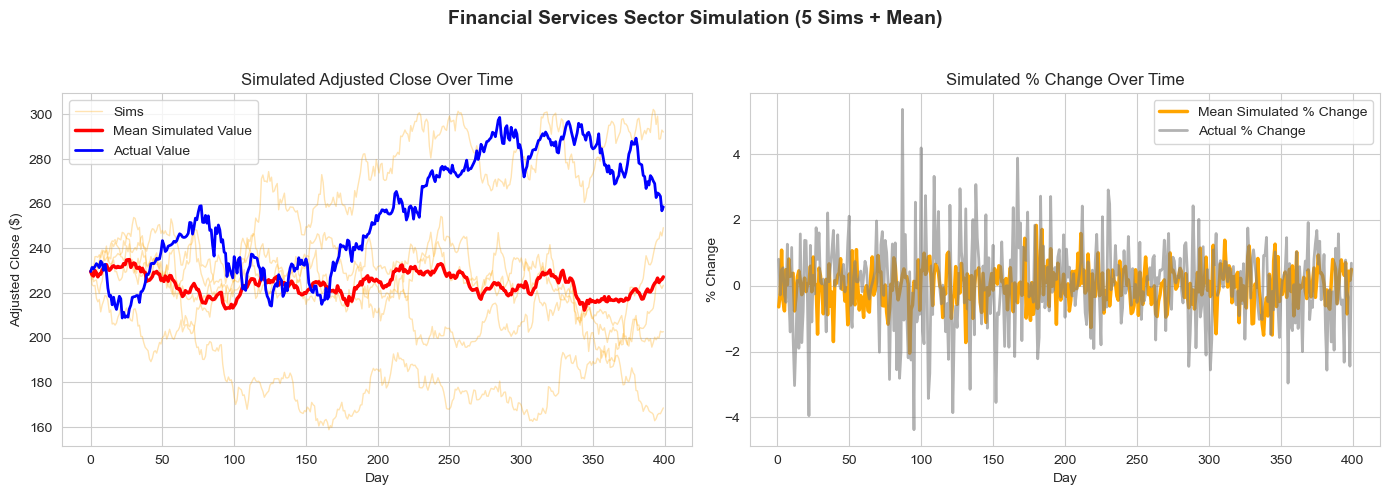

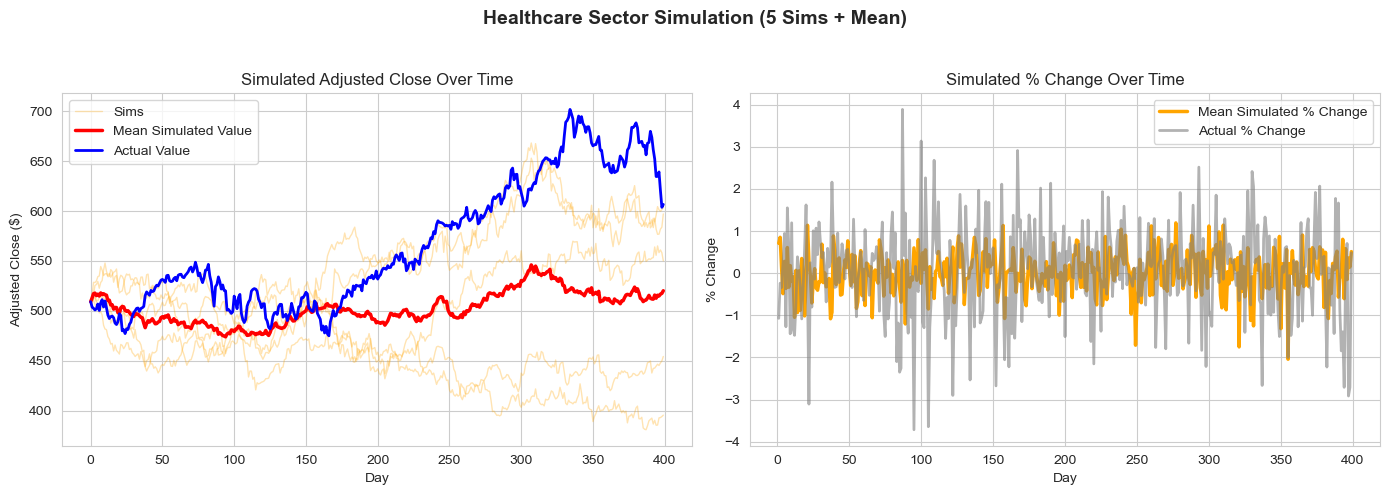

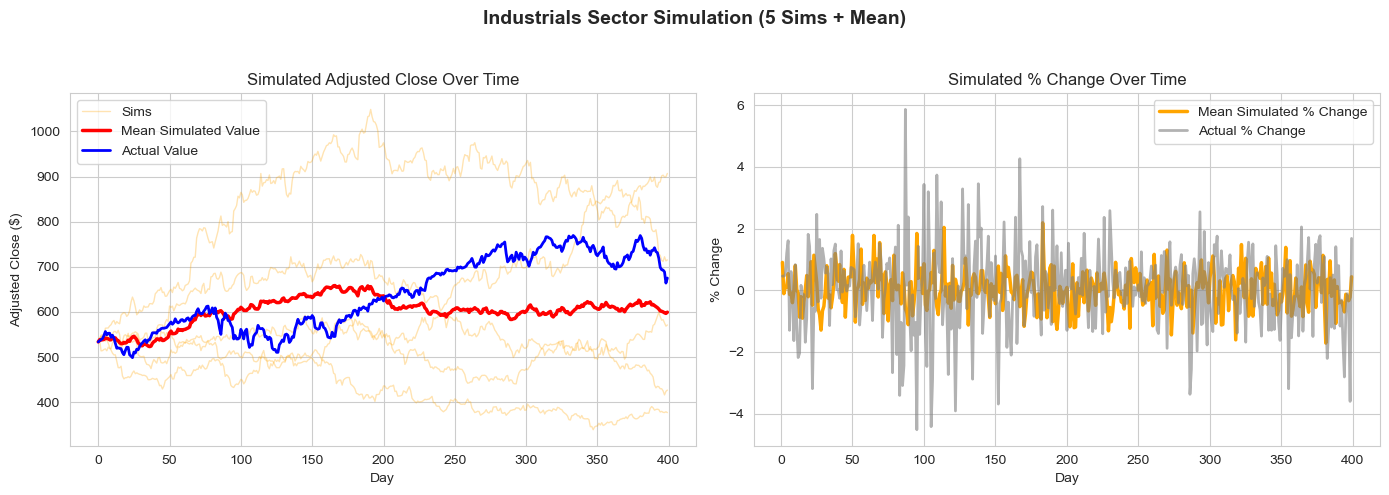

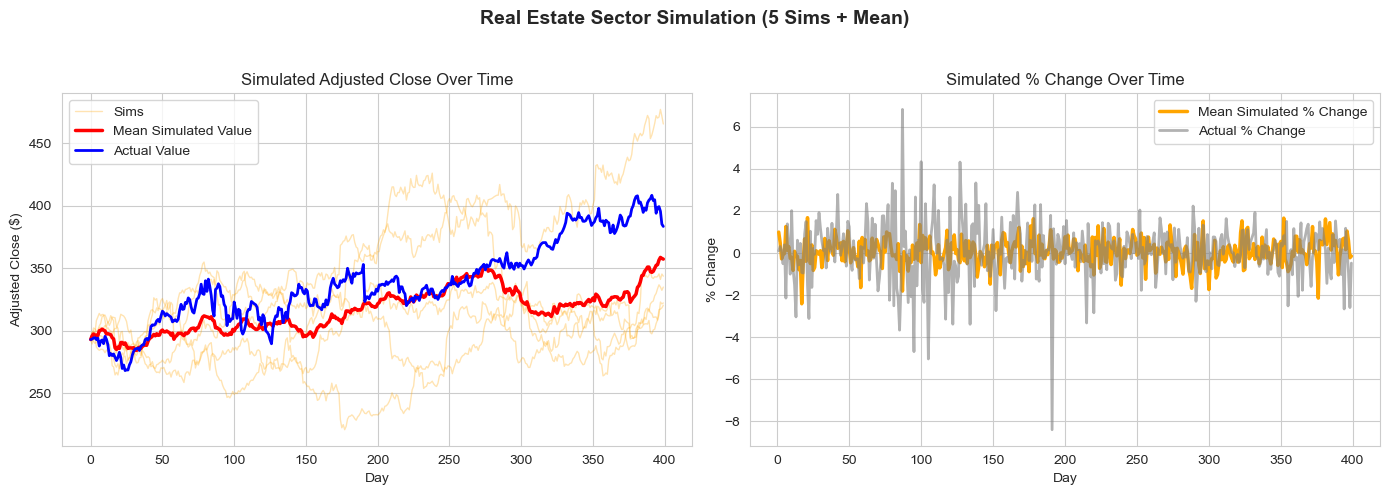

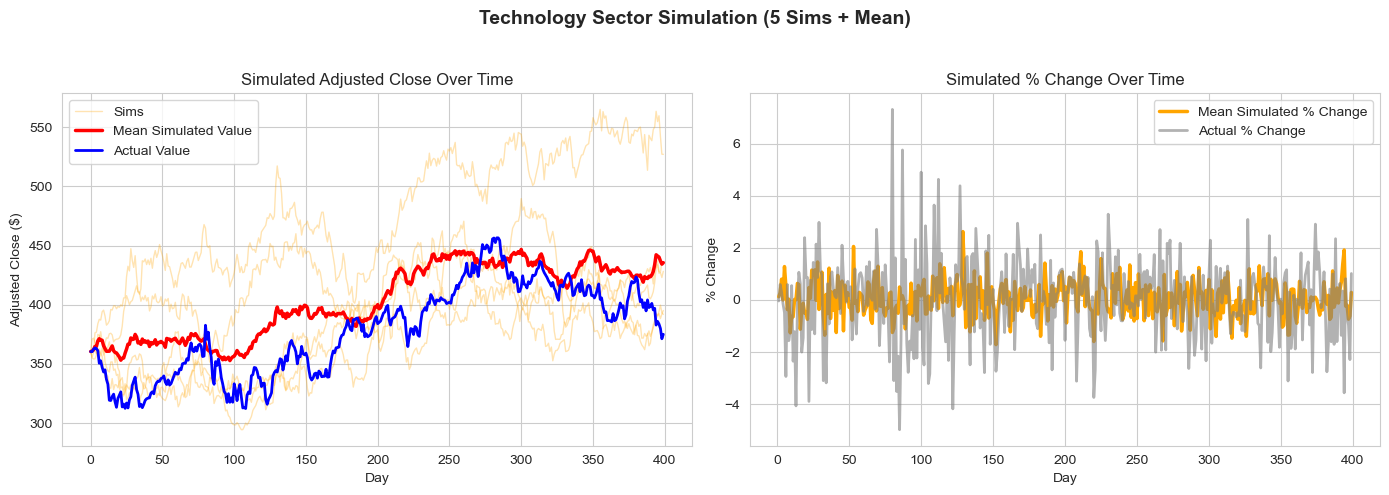

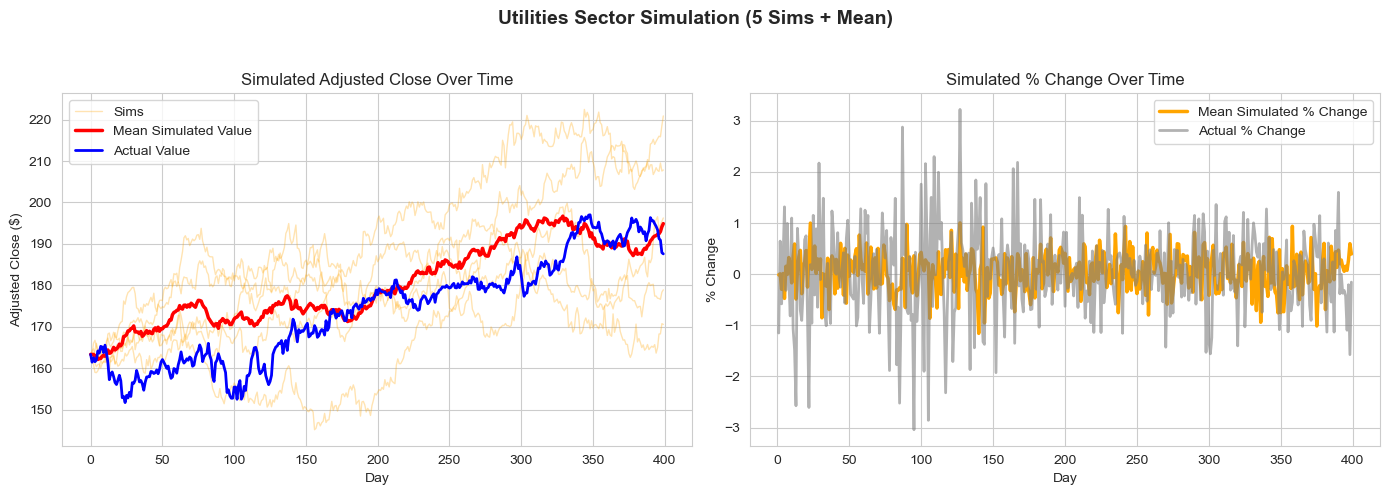

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

for cat in categories:
    sector_df = df_map[cat]

    # Retrieve all 5 sim series and mean (from sim_results dict)
    sim_series = sim_results[cat]                 # list of 5 lists (each sim)
    avg_adj_close = sector_df["Avg_Sim_Adj_Close"]  # already added earlier

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    fig.suptitle(f"{cat} Sector Simulation (5 Sims + Mean)", fontsize=14, fontweight='bold')

    # ---- Plot 1: Simulated Adjusted Close ----
    # plot each simulation line faintly
    for i, sim in enumerate(sim_series):
        axes[0].plot(sector_df.index, sim, color='orange', alpha=0.3, linewidth=1, label=f"Sims" if i == 0 else "")

    # plot the mean of all 5 sims
    axes[0].plot(sector_df.index, avg_adj_close, color='red', linewidth=2.5, label="Mean Simulated Value")

    # plot the actual (real) value
    axes[0].plot(sector_df.index, sector_df["Adj Close"], color='blue', linewidth=2, label="Actual Value")

    axes[0].set_title("Simulated Adjusted Close Over Time")
    axes[0].set_xlabel("Day")
    axes[0].set_ylabel("Adjusted Close ($)")
    axes[0].legend()

    # ---- Plot 2: Simulated % Change ----
    # Compute mean % change across the 5 sims
    # (Each sim’s % change was generated during the loop, so we’ll need them stored.)
    # If not stored, we can approximate with pct change from mean line:
    avg_sim_pct_change = avg_adj_close.pct_change() * 100

    axes[1].plot(sector_df.index, avg_sim_pct_change, color='orange', linewidth=2.5, label="Mean Simulated % Change")
    axes[1].plot(sector_df.index, sector_df["pctChange"], color='gray', alpha=0.6, linewidth=2, label="Actual % Change")

    axes[1].set_title("Simulated % Change Over Time")
    axes[1].set_xlabel("Day")
    axes[1].set_ylabel("% Change")
    axes[1].legend()

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


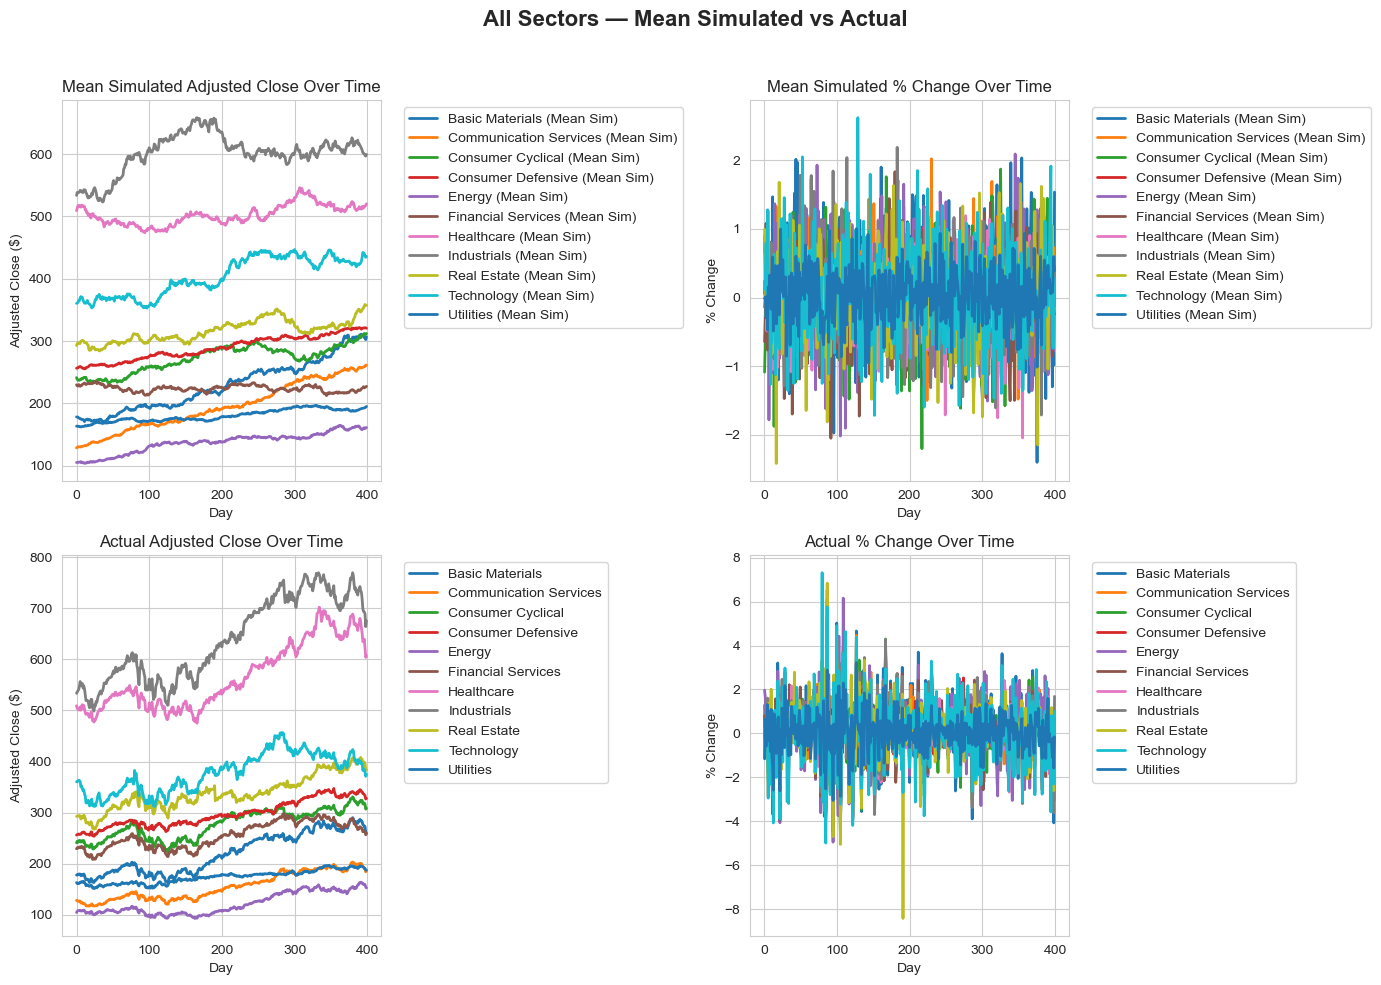

In [18]:
sns.set_style("whitegrid")

# ---- Combined Figure (2x2 Grid) ----
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("All Sectors — Mean Simulated vs Actual", fontsize=16, fontweight='bold')

# ---- Plot 1: Mean Simulated Adjusted Close Over Time ----
for cat in categories:
    sector_df = df_map[cat]
    axes[0, 0].plot(
        sector_df.index,
        sector_df["Avg_Sim_Adj_Close"],
        label=f"{cat} (Mean Sim)",
        linewidth=2
    )

axes[0, 0].set_title("Mean Simulated Adjusted Close Over Time")
axes[0, 0].set_xlabel("Day")
axes[0, 0].set_ylabel("Adjusted Close ($)")
axes[0, 0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# ---- Plot 2: Mean Simulated % Change Over Time ----
for cat in categories:
    sector_df = df_map[cat]
    mean_pct_change = sector_df["Avg_Sim_Adj_Close"].pct_change() * 100
    axes[0, 1].plot(
        sector_df.index,
        mean_pct_change,
        label=f"{cat} (Mean Sim)",
        linewidth=2,
        color=None  # let Matplotlib assign distinct colors
    )

axes[0, 1].set_title("Mean Simulated % Change Over Time")
axes[0, 1].set_xlabel("Day")
axes[0, 1].set_ylabel("% Change")
axes[0, 1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# ---- Plot 3: Actual Adjusted Close Over Time ----
for cat in categories:
    sector_df = df_map[cat]
    axes[1, 0].plot(
        sector_df.index,
        sector_df["Adj Close"],
        label=cat,
        linewidth=2
    )

axes[1, 0].set_title("Actual Adjusted Close Over Time")
axes[1, 0].set_xlabel("Day")
axes[1, 0].set_ylabel("Adjusted Close ($)")
axes[1, 0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# ---- Plot 4: Actual % Change Over Time ----
for cat in categories:
    sector_df = df_map[cat]
    axes[1, 1].plot(
        sector_df.index,
        sector_df["pctChange"],
        label=cat,
        linewidth=2
    )

axes[1, 1].set_title("Actual % Change Over Time")
axes[1, 1].set_xlabel("Day")
axes[1, 1].set_ylabel("% Change")
axes[1, 1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()